In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
(x_cancer,y_cancer)=load_breast_cancer(return_X_y=True)
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

## Dimensionality Reduction and Manifold Learning

### Principal Components Analysis (PCA)

#### Using PCA to find the first two principal components of the breast cancer dataset

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
x_normalized=StandardScaler().fit(x_cancer).transform(x_cancer)
pca=PCA(n_components=2).fit(x_normalized)
x_pca=pca.transform(x_normalized)
print(x_cancer.shape,x_pca.shape)

(569, 30) (569, 2)


#### Plotting the PCA-transformed version of the breast cancer dataset


Text(0.5, 1.0, 'Breast Cancer Dataset PCA (n_components = 2)')

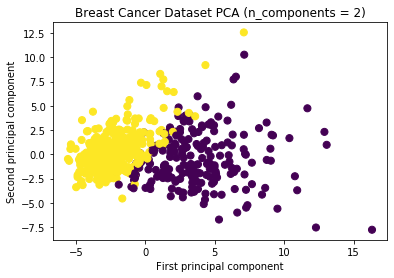

In [33]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_cancer,marker="o",s=50)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)')

#### Plotting the magnitude of each feature value for the first two principal components

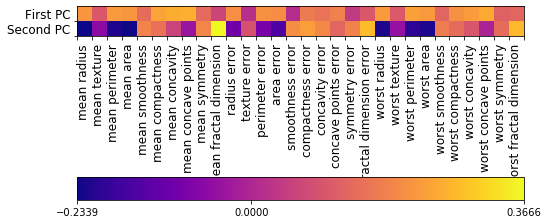

In [11]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

#### PCA on the fruit dataset (for comparison)

In [35]:
x_norm=StandardScaler().fit(X_fruits).transform(X_fruits)
pca=PCA(n_components=2).fit(x_norm)
x_pca=pca.transform(x_norm)
print(X_fruits.shape,x_pca.shape)

(59, 4) (59, 2)


Text(0.5, 1.0, 'fruits PCA n_components=2')

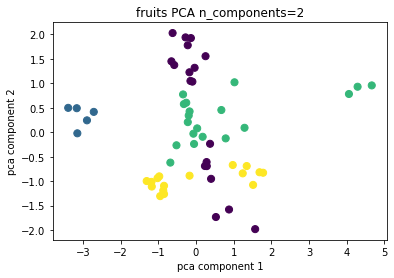

In [38]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=list(y_fruits['fruit_label']),s=50,marker="o")
plt.xlabel("pca component 1")
plt.ylabel("pca component 2")
plt.title("fruits PCA n_components=2")

### Manifold learning methods

#### Multidimensional scaling (MDS) on the fruit dataset

Text(0.5, 1.0, 'fruits MDS n_components=2')

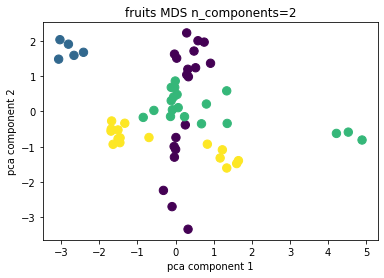

In [41]:
from sklearn.manifold import MDS
mds=MDS(n_components=2)
x_fruits_mds=mds.fit_transform(x_norm)
plt.scatter(x_fruits_mds[:,0],x_fruits_mds[:,1],c=list(y_fruits['fruit_label']),marker="o",s=70)
plt.xlabel("pca component 1")
plt.ylabel("pca component 2")
plt.title("fruits MDS n_components=2")

#### Multidimensional scaling (MDS) on the breast cancer dataset

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer
cancer_data=load_breast_cancer(return_X_y=True)
(x,y)=load_breast_cancer(return_X_y=True)

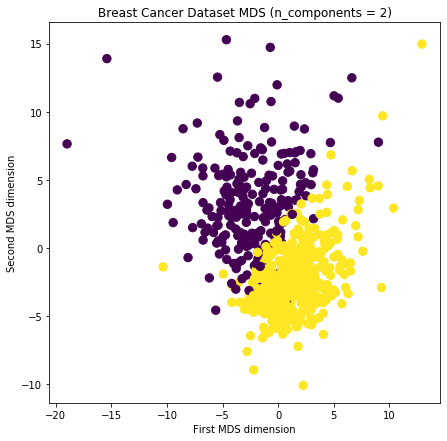

In [56]:
x_norm=StandardScaler().fit(x).transform(x)
mds=MDS(n_components=2)
x_mds=mds.fit_transform(x_norm)
plt.figure(figsize=(7,7))
plt.scatter(x_mds[:,0],x_mds[:,1],c=y,s=70)
plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

#### t-SNE on the cancer dataset

Text(0.5, 1.0, 'breast cancer dataset t-sne')

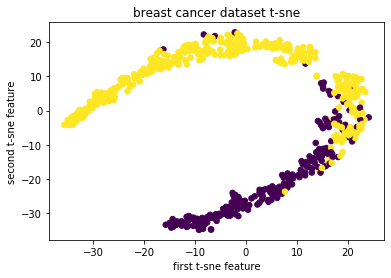

In [59]:
from sklearn.manifold import TSNE
tsne=TSNE(random_state=0)
x_tsne=tsne.fit_transform(x)
plt.scatter(x_tsne[:,0],x_tsne[:,1],c=y,s=30)
plt.xlabel("first t-sne feature")
plt.ylabel("second t-sne feature")
plt.title("breast cancer dataset t-sne")